**Tên: Phùng Nghĩa Phúc**

**MSV: 20127284**

In [1]:
import tensorflow as tf
print(tf.test.gpu_device_name())

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2926199936790049565
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2643513995591192846
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
import torch

print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

# additional info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

0
1
Tesla T4
True
Using device: cuda

Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


/usr/local/lib/python3.8/dist-packages/torch/cuda/memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
%cd /content/gdrive/My\ Drive
%mkdir colab
%cd /content/gdrive/My\ Drive/colab
!rm -rf pytorch-YOLOv4
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

/content/gdrive/My Drive
mkdir: cannot create directory ‘colab’: File exists
/content/gdrive/My Drive/colab
Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 413, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 413 (delta 4), reused 4 (delta 1), pack-reused 401
Receiving objects: 100% (413/413), 932.49 KiB | 6.86 MiB/s, done.
Resolving deltas: 100% (231/231), done.
/content/gdrive/My Drive/colab/pytorch-YOLOv4


In [5]:
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4
!pip install -r requirements.txt

/content/gdrive/My Drive/colab/pytorch-YOLOv4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.6 MB 1.3 MB/s 
     |████████████████████████████████| 753.4 MB 22 kB/s 
     |████████████████████████████████| 26.5 MB 1.2 MB/s 
     |████████████████████████████████| 36.8 MB 517 kB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 
     |████████████████████████████████| 125 kB 77.0 MB/s 
  Created wheel for matplotlib: filename=matplotlib-2.2.3-cp38-cp38-linux_x86_64.whl size=10554247 sha256=2c2ba440ad9ccf7b0a82da8d782ab6f62579bf6631b7d824879d3d91bb8cfe9a
  Stored in directory: /root/.cache/pip/wheels/32/9e/42/1c91b0d0aa4bc87be038ee6aa88f303df10286c165feaa9823
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6360 sha256=10d682babc8a8a99653a3ee2332b25d59b821668962fe308e63005f51e0d861a
  Stored in directory: /root/.cache/pip/wheels/d3/e0/e9/305e348717e399665119bd01

In [ ]:
!rm -rf /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip
!unzip /content/gdrive/My\ Drive/colab/data/BCCD.v1-resize-416x416.yolov4pytorch.zip -d /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip

Archive:  /content/gdrive/My Drive/colab/data/BCCD.v1-resize-416x416.yolov4pytorch.zip
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage_00336_jpg.rf.5ae87ede3994ca14504136035e256e38.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage_00386_jpg.rf.1de8e2e0e94f942d7a1523852d7fb146.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage_00154_jpg.rf.7c682b32a64ca0520b6fc725f0d667c7.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage_00160_jpg.rf.500f16e32681898ca1ce052ea0402c08.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage_00120_jpg.rf.6742a4da047e1226a181d2de2978ce6d.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage_00265_jpg.rf.4b7cc25caca963b5e0325c6998917cd1.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/BloodImage

In [ ]:
# Step 04.1.2 Prepare dataset & weights (by unzip file)

%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

!rm -rf train
%mkdir train
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_annotations.txt train/train.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_classes.txt train/_classes.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_annotations.txt train.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/*.jpg train/
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/valid/*.jpg train/

!rm -rf data
%mkdir data
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/valid/_annotations.txt data/val.txt

!rm -rf test
%mkdir test
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/test/_classes.txt test/_classes.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/test/*.jpg test/

/content/gdrive/My Drive/colab/pytorch-YOLOv4


In [ ]:
# Step 04.3 Check the number of classes
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

/content/gdrive/My Drive/colab/pytorch-YOLOv4
3


In [ ]:
# copy converted pre-trained weights
%cp /content/gdrive/My\ Drive/colab/weights/yolov4.conv.137.pth yolov4.conv.137.pth

In [ ]:
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4
!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 100

/content/gdrive/My Drive/colab/pytorch-YOLOv4
log file path:log/log_2020-07-29_05-39-02.txt
2020-07-29 05:39:02,396 train.py[line:435] INFO: Using device cuda
2020-07-29 05:39:13,997 train.py[line:282] INFO: Starting training:
        Epochs:          100
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   255
        Validation size: 73
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 3
        Train label path:train.txt
        Pretrained:
    
Epoch 1/100:   0%|       | 0/255 [00:00<?, ?img/s]/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/100:  15%|▏| 38/255 [00:14<01:05,  3.31img/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the

In [ ]:
# Continue training from the checkpoint if result not good
#!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./checkpoints/Yolov4_epoch50.pth -classes {num_classes} -dir ./train -epochs 50

In [ ]:
!ls checkpoints

Yolov4_epoch100.pth  Yolov4_epoch30.pth  Yolov4_epoch55.pth  Yolov4_epoch75.pth
Yolov4_epoch10.pth   Yolov4_epoch35.pth  Yolov4_epoch5.pth   Yolov4_epoch80.pth
Yolov4_epoch15.pth   Yolov4_epoch40.pth  Yolov4_epoch60.pth  Yolov4_epoch85.pth
Yolov4_epoch20.pth   Yolov4_epoch45.pth  Yolov4_epoch65.pth  Yolov4_epoch90.pth
Yolov4_epoch25.pth   Yolov4_epoch50.pth  Yolov4_epoch70.pth  Yolov4_epoch95.pth


In [ ]:
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

print(img_path)

test/BloodImage_00301_jpg.rf.9c427e66bcc1b088df9a5e71c0abefba.jpg


WBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
RBC: 1.000000
save plot results to predictions.jpg


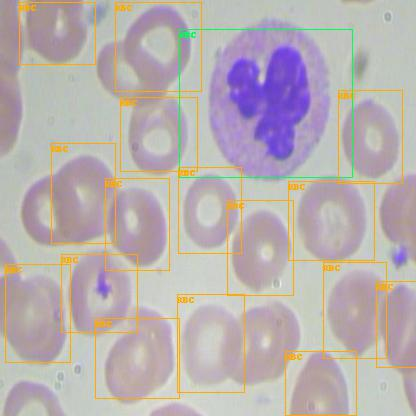

In [ ]:
# Run test for a random image using a chosen checkpoints and visualization the result
!python models.py 3 checkpoints/Yolov4_epoch100.pth {img_path} test/_classes.txt

from IPython.display import Image
Image('predictions.jpg')